In [45]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split

In [46]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [47]:
def load_data():
    boston = load_boston()
    print boston.DESCR
    X = boston["data"]
    Y = boston["target"]
    names = boston["feature_names"]
    return X,Y,names

In [48]:
def scale_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [49]:
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [50]:
def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [51]:
def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt

In [52]:
X,Y,names = load_data()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [53]:
np.set_printoptions(precision=2, linewidth=100, suppress=True, edgeitems=2)

In [54]:
X[0:5]

array([[   0.01,   18.  ,    2.31,    0.  ,    0.54,    6.58,   65.2 ,    4.09,    1.  ,  296.  ,
          15.3 ,  396.9 ,    4.98],
       [   0.03,    0.  ,    7.07,    0.  ,    0.47,    6.42,   78.9 ,    4.97,    2.  ,  242.  ,
          17.8 ,  396.9 ,    9.14],
       [   0.03,    0.  ,    7.07,    0.  ,    0.47,    7.18,   61.1 ,    4.97,    2.  ,  242.  ,
          17.8 ,  392.83,    4.03],
       [   0.03,    0.  ,    2.18,    0.  ,    0.46,    7.  ,   45.8 ,    6.06,    3.  ,  222.  ,
          18.7 ,  394.63,    2.94],
       [   0.07,    0.  ,    2.18,    0.  ,    0.46,    7.15,   54.2 ,    6.06,    3.  ,  222.  ,
          18.7 ,  396.9 ,    5.33]])

In [55]:
X = scale_data(X)

In [56]:
X_train, X_test, Y_train, Y_test = split_data(X,Y)

# Let's try Linear Regression:

Linear model:  -3.913 * LSTAT + -2.994 * DIS + 2.733 * RM + 2.04 * RAD + -2.011 * PTRATIO + -1.878 * NOX + -1.381 * TAX + -1.1 * CRIM + 1.087 * B + 0.881 * ZN + 0.822 * CHAS + 0.402 * INDUS + -0.36 * AGE
Root Mean Square Error:  4.55490322184


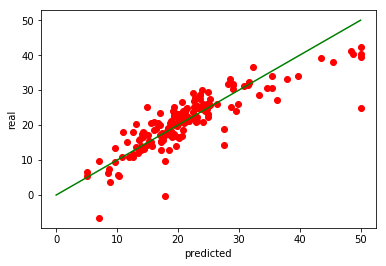

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [57]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

print "Linear model: ", pretty_print_linear(linreg.coef_, names, sort = True)

# Predict the values using the model
Y_lin_predict = linreg.predict(X_test)

# Print the root mean square error 
print "Root Mean Square Error: ", root_mean_square_error(Y_lin_predict,Y_test)
plot_real_vs_predicted(Y_test,Y_lin_predict)

# Let's try Lasso Regression:

Lasso model:  -4.012 * LSTAT + 2.856 * RM + -1.612 * PTRATIO + -0.911 * DIS + 0.807 * B + 0.736 * CHAS + -0.425 * NOX + -0.29 * CRIM + 0.0 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX
Root Mean Square Error:  4.84544422019


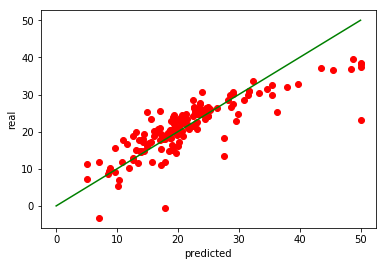

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [58]:
# Create lasso regression object
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(X_train, Y_train) 

print "Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True)

# Predict the values using the model
Y_lasso_predict = lasso.predict(X_test)

# Print the root mean square error 
print "Root Mean Square Error: ", root_mean_square_error(Y_lasso_predict,Y_test)
plot_real_vs_predicted(Y_test,Y_lasso_predict)

# Let's try Ridge Regression:

Ridge model:  -3.908 * LSTAT + -2.981 * DIS + 2.735 * RM + 2.014 * RAD + -2.008 * PTRATIO + -1.866 * NOX + -1.359 * TAX + -1.095 * CRIM + 1.086 * B + 0.874 * ZN + 0.824 * CHAS + 0.393 * INDUS + -0.36 * AGE
Root Mean Square Error:  4.55578939802


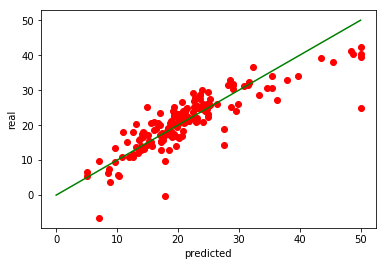

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [59]:
ridge = Ridge(fit_intercept=True, alpha=.3)
              
# Train the model using the training sets
ridge.fit(X_train, Y_train) 

print "Ridge model: ", pretty_print_linear(ridge.coef_, names, sort = True)

# Predict the values using the model
Y_ridge_predict = ridge.predict(X_test)

# Print the root mean square error 
print "Root Mean Square Error: ", root_mean_square_error(Y_ridge_predict,Y_test)
plot_real_vs_predicted(Y_test,Y_ridge_predict)

# Now let's try to do regression via Elastic Net.

Elastic Net model:  -3.34 * LSTAT + 2.799 * RM + -1.576 * PTRATIO + -1.142 * DIS + 0.852 * CHAS + 0.85 * B + -0.703 * NOX + -0.505 * CRIM + 0.195 * ZN + -0.162 * AGE + -0.055 * TAX + -0.038 * INDUS + 0.0 * RAD
Root Mean Square Error:  4.81065463713


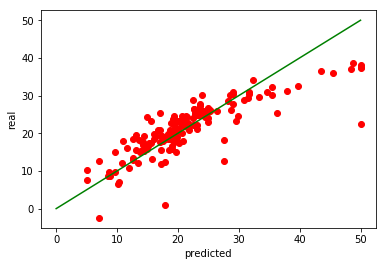

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [60]:
elnet = ElasticNet(fit_intercept=True, alpha=.3)
              
# Train the model using the training sets
elnet.fit(X_train, Y_train) 

print "Elastic Net model: ", pretty_print_linear(elnet.coef_, names, sort = True)

# Predict the values using the model
Y_elnet_predict = elnet.predict(X_test)

# Print the root mean square error 
print "Root Mean Square Error: ", root_mean_square_error(Y_elnet_predict,Y_test)
plot_real_vs_predicted(Y_test,Y_elnet_predict)

# Now let's try to do regression via Stochastic Gradient Descent.

Stochastic Gradient Descent model:  -3.322 * LSTAT + 2.775 * RM + -1.795 * DIS + -1.682 * PTRATIO + -0.977 * NOX + 0.961 * B + 0.924 * CHAS + -0.747 * CRIM + 0.598 * RAD + 0.452 * ZN + -0.428 * TAX + -0.357 * AGE + -0.108 * INDUS
Root Mean Square Error:  4.67811535945


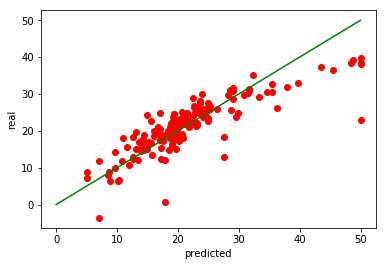

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [61]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Train the model using the training sets
sgdreg.fit(X_train, Y_train) 

print "Stochastic Gradient Descent model: ", pretty_print_linear(sgdreg.coef_, names, sort = True)

# Predict the values using the model
Y_sgdreg_predict = sgdreg.predict(X_test)

# Print the root mean square error 
print "Root Mean Square Error: ", root_mean_square_error(Y_sgdreg_predict,Y_test)
plot_real_vs_predicted(Y_test,Y_sgdreg_predict)